<a href="https://colab.research.google.com/github/Priyanka5810/700744635/blob/main/QUIZ_PROGRAMING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

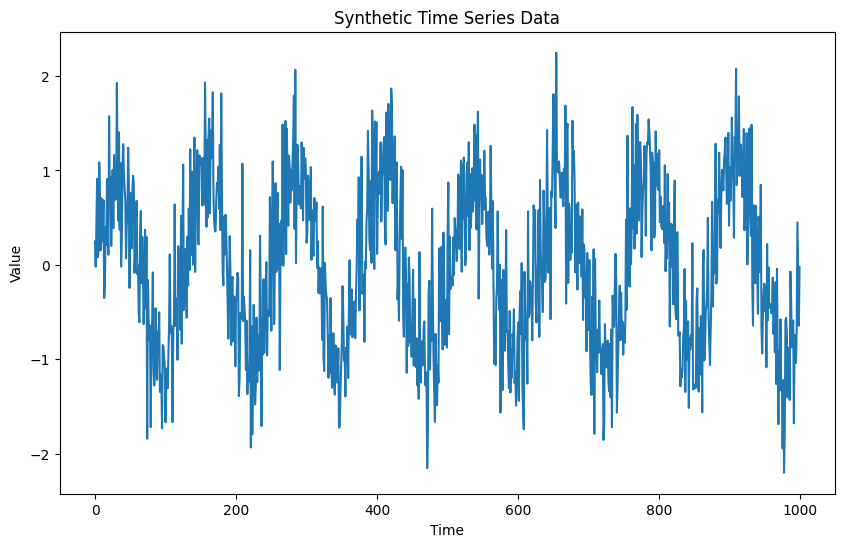

In [4]:
# Necessary packages
import numpy as np
import matplotlib.pyplot as plt

# Generating artificial time series data
np.random.seed(42)  # For reproducibility
t = np.arange(0, 1000, 1)
sine_wave = np.sin(t * 0.05) + np.random.normal(scale=0.5, size=len(t))

# Data plotting
plt.figure(figsize=(10, 6))
plt.plot(sine_wave)
plt.title("Synthetic Time Series Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()


In [6]:
# Necessary packages
from sklearn.preprocessing import MinMaxScaler

# Data scaling
scaler = MinMaxScaler(feature_range=(0, 1))
wave_scaled = scaler.fit_transform(sine_wave.reshape(-1, 1))

# Dataset creation function for LSTM
def create_data(data, look_back=60):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), 0]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Train-test split
train_size = int(len(wave_scaled) * 0.67)
test_size = len(wave_scaled) - train_size
train, test = wave_scaled[0:train_size,:], wave_scaled[train_size:len(wave_scaled),:]
X_train, Y_train = create_data(train, 60)
X_test, Y_test = create_data(test, 60)

# Reshaping inputs
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

X_train.shape, X_test.shape


((609, 1, 60), (269, 1, 60))

In [8]:
# Necessary imports
from keras.models import Sequential
from keras.layers import LSTM, Dense

# LSTM model construction
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Model summary
lstm_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                22200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 22251 (86.92 KB)
Trainable params: 22251 (86.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Necessary imports
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Model definition
new_model = Sequential()
new_model.add(LSTM(50, input_shape=(1, 60)))  # Input shape: [time steps, features]
new_model.add(Dense(1))
new_model.compile(optimizer='adam', loss='mean_squared_error')


In [11]:
# Model training
history_lstm = new_model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), verbose=2)


Epoch 1/100
20/20 - 3s - loss: 0.1505 - val_loss: 0.0694 - 3s/epoch - 166ms/step
Epoch 2/100
20/20 - 0s - loss: 0.0405 - val_loss: 0.0309 - 210ms/epoch - 11ms/step
Epoch 3/100
20/20 - 0s - loss: 0.0233 - val_loss: 0.0198 - 196ms/epoch - 10ms/step
Epoch 4/100
20/20 - 0s - loss: 0.0178 - val_loss: 0.0158 - 175ms/epoch - 9ms/step
Epoch 5/100
20/20 - 0s - loss: 0.0154 - val_loss: 0.0143 - 219ms/epoch - 11ms/step
Epoch 6/100
20/20 - 0s - loss: 0.0145 - val_loss: 0.0142 - 206ms/epoch - 10ms/step
Epoch 7/100
20/20 - 0s - loss: 0.0153 - val_loss: 0.0142 - 246ms/epoch - 12ms/step
Epoch 8/100
20/20 - 0s - loss: 0.0145 - val_loss: 0.0134 - 229ms/epoch - 11ms/step
Epoch 9/100
20/20 - 0s - loss: 0.0139 - val_loss: 0.0146 - 239ms/epoch - 12ms/step
Epoch 10/100
20/20 - 0s - loss: 0.0147 - val_loss: 0.0135 - 203ms/epoch - 10ms/step
Epoch 11/100
20/20 - 0s - loss: 0.0134 - val_loss: 0.0139 - 184ms/epoch - 9ms/step
Epoch 12/100
20/20 - 0s - loss: 0.0137 - val_loss: 0.0132 - 192ms/epoch - 10ms/step
Epoch

In [ ]:
# @title Image Classification Task:
# @markdown Load the MNIST dataset.
# @markdown Build a simple convolutional neural network (CNN) using Keras Sequential model.
# @markdown Train the CNN model on the MNIST dataset.
# @markdown Evaluate the model's performance on a test set and report accuracy.
# @markdown Use grid search to optimize hyperparameters such as learning rate, batch size, and optimizer choice.
# @markdown Use Callback functions to automate training process like “ReduceLROnPlateau” and keep check on validation loss.
# @markdown Also use history object for result visualization.


In [12]:
# Necessary imports
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Data loading
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshaping to [samples][width][height][channels]
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32')
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32')

# Normalizing from 0-255 to 0-1
train_images /= 255
test_images /= 255

# One hot encoding outputs
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
num_classes = test_labels.shape[1]


11490434/11490434 [==============================] - 0s 0us/step


In [13]:
# Necessary imports
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# Model definition
new_model = Sequential()
new_model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
new_model.add(MaxPooling2D(pool_size=(2, 2)))
new_model.add(Flatten())
new_model.add(Dense(128, activation='relu'))
new_model.add(Dense(num_classes, activation='softmax'))

# Model compilation
new_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [14]:
# Necessary import
from keras.callbacks import ReduceLROnPlateau

# Callback definition
# Necessary import
from keras.callbacks import ReduceLROnPlateau

# Callback definition
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Training
history_cnn = new_model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=200, callbacks=[reduce_lr_callback], verbose=2)


Epoch 1/10
300/300 - 32s - loss: 0.2342 - accuracy: 0.9336 - val_loss: 0.0768 - val_accuracy: 0.9763 - lr: 0.0010 - 32s/epoch - 106ms/step
Epoch 2/10
300/300 - 30s - loss: 0.0710 - accuracy: 0.9790 - val_loss: 0.0498 - val_accuracy: 0.9832 - lr: 0.0010 - 30s/epoch - 99ms/step
Epoch 3/10
300/300 - 29s - loss: 0.0487 - accuracy: 0.9852 - val_loss: 0.0458 - val_accuracy: 0.9853 - lr: 0.0010 - 29s/epoch - 98ms/step
Epoch 4/10
300/300 - 30s - loss: 0.0371 - accuracy: 0.9886 - val_loss: 0.0425 - val_accuracy: 0.9860 - lr: 0.0010 - 30s/epoch - 99ms/step
Epoch 5/10
300/300 - 28s - loss: 0.0283 - accuracy: 0.9909 - val_loss: 0.0369 - val_accuracy: 0.9878 - lr: 0.0010 - 28s/epoch - 93ms/step
Epoch 6/10
300/300 - 28s - loss: 0.0230 - accuracy: 0.9930 - val_loss: 0.0366 - val_accuracy: 0.9873 - lr: 0.0010 - 28s/epoch - 92ms/step
Epoch 7/10
300/300 - 27s - loss: 0.0182 - accuracy: 0.9942 - val_loss: 0.0324 - val_accuracy: 0.9894 - lr: 0.0010 - 27s/epoch - 91ms/step
Epoch 8/10
300/300 - 27s - loss: 

In [15]:
# Model evaluation
scores = new_model.evaluate(test_images, test_labels, verbose=0)
print("CNN Error: %.2f%%" % (100 - scores[1] * 100))


CNN Error: 1.24%


In [7]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Load and preprocess data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

def build_model(learning_rate=0.001):
    model = Sequential([
        Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Grid search settings
learning_rates = [0.001, 0.0001]
batch_sizes = [32, 64]

# Grid search
best_accuracy = 0
best_lr = 0
best_batch = 0

for lr in learning_rates:
    for batch_size in batch_sizes:
        model = build_model(learning_rate=lr)
        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=batch_size, verbose=0)
        accuracy = np.max(history.history['val_accuracy'])
        print(f"LR={lr}, Batch={batch_size}, Val Accuracy={accuracy}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_lr = lr
            best_batch = batch_size

print(f"Best parameters: LR={best_lr}, Batch={best_batch}, with accuracy={best_accuracy}")

LR=0.001, Batch=32, Val Accuracy=0.9897000193595886
LR=0.001, Batch=64, Val Accuracy=0.9890999794006348
LR=0.0001, Batch=32, Val Accuracy=0.9833999872207642
LR=0.0001, Batch=64, Val Accuracy=0.9807999730110168
Best parameters: LR=0.001, Batch=32, with accuracy=0.9897000193595886


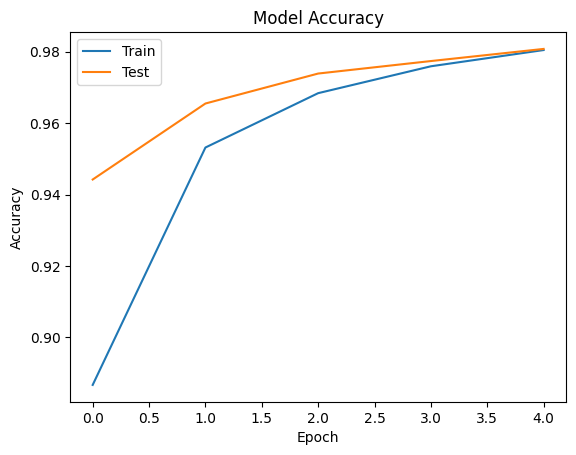

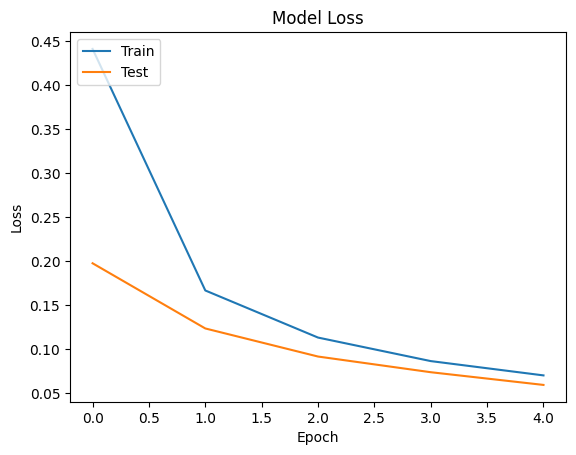

In [9]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()